<a href="https://colab.research.google.com/github/Poojarajan22/ICTProjectFinal/blob/main/Copy_of_best_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install wikipedia sentence-transformers transformers faiss-cpu matplotlib seaborn torch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 23.3 MB/s eta 0:00:00


Documents Loaded: 8


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/568M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/106 [00:00<?, ?it/s]

DebertaV2ForSequenceClassification LOAD REPORT from: cross-encoder/nli-deberta-v3-small
Key                             | Status     |  | 
--------------------------------+------------+--+-
deberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json: 0.00B [00:00, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]


=========== VERIFIED QA SYSTEM ===========
Ask AI questions (type exit to stop)

Your Question: what is machine learning?

--- Retrieved Context ---
In machine learning, supervised learning (SL) is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs. This process involves training a statistical model using labeled data, meaning each piece of input data is provided with the correct output. For instance, if you want a model to identify cats in images, supervised

--- Generated Answer ---
a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs

Scores:
Entailment: 0.94
Similarity: 0.4
Hallucination: 0.06
Verification: ✅ Verified


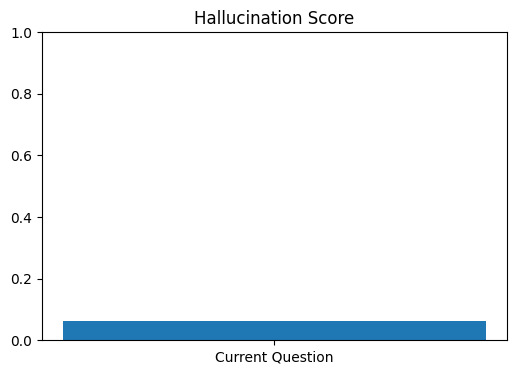

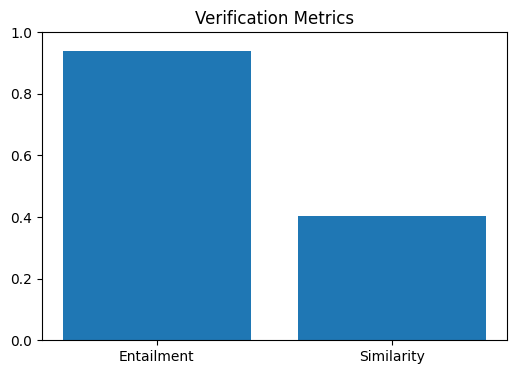

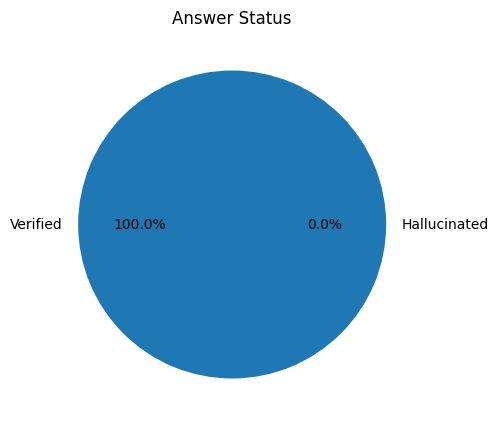

Your Question: who is father of python?

--- Retrieved Context ---
Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take 

--- Generated Answer ---
Answer not found in the given context

Scores:
Entailment: 1.0
Similarity: 0.09
Hallucination: 1.0
Verification: ❌ Unanswerable


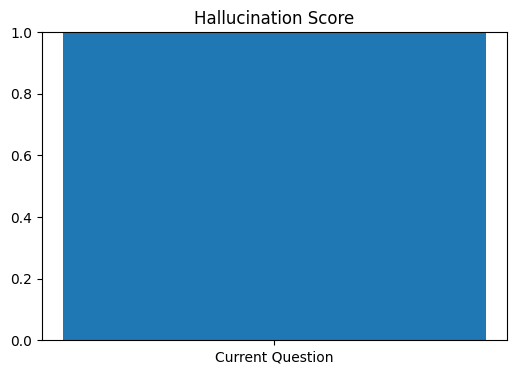

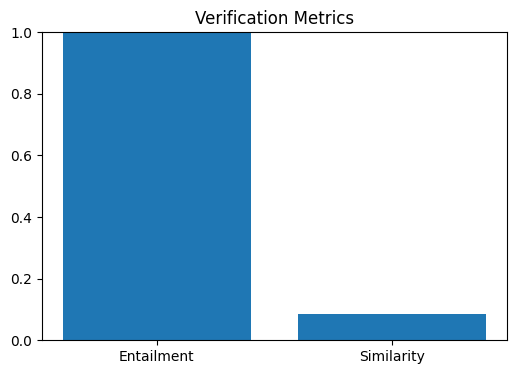

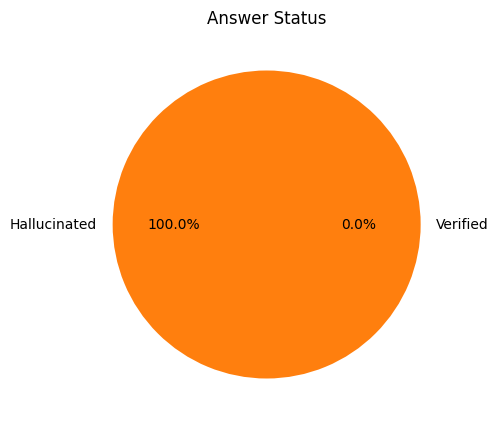

In [ ]:
import wikipedia
import numpy as np
import faiss
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

from sentence_transformers import SentenceTransformer, CrossEncoder
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# ------------------ LOAD WIKI DATA ------------------

wiki_topics = [
    "Artificial intelligence",
    "Machine learning",
    "Deep learning",
    "Natural language processing",
    "Neural network (machine learning)",
    "Computer vision",
    "Data science",
    "Supervised learning",
    "Unsupervised learning",
    "Convolutional neural network"
]

contexts = []

for topic in wiki_topics:
    try:
        contexts.append(wikipedia.summary(topic, sentences=4))
    except wikipedia.exceptions.DisambiguationError as e:
        contexts.append(wikipedia.summary(e.options[0], sentences=4))
    except:
        pass

print("Documents Loaded:", len(contexts))

# ------------------ EMBEDDINGS ------------------

embed_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embed_model.encode(contexts, convert_to_numpy=True)

dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

def retrieve_documents(query, top_k=2):
    q_emb = embed_model.encode([query])
    D, I = index.search(np.array(q_emb), top_k)
    return [contexts[i] for i in I[0]]

# ------------------ GENERATOR ------------------

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

def clean_context(docs, max_chars=900):
    return " ".join([doc[:max_chars] for doc in docs])

def generate_answer(query, docs):

    context = clean_context(docs)

    prompt = f"""
Answer ONLY using the context.
If answer not present, say:
"Answer not found in the provided context."

Context:
{context}

Question:
{query}

Answer:
"""

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)

    outputs = model.generate(
        **inputs,
        max_length=120,
        do_sample=False
    )

    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

    if len(answer.strip()) == 0:
        answer = "Answer not found in the provided context."

    return answer

# ------------------ HALLUCINATION CHECK ------------------

nli_model = CrossEncoder("cross-encoder/nli-deberta-v3-small")

def hallucination_score(answer, docs):

    scores = []

    for doc in docs:
        outputs = nli_model.predict([(doc, answer)])
        probs = F.softmax(torch.tensor(outputs), dim=1).numpy()[0]
        entailment_prob = float(probs[2])
        scores.append(entailment_prob)

    best_entailment = max(scores)
    HS = 1 - best_entailment

    return HS, best_entailment

# ------------------ SIMILARITY ------------------

def semantic_similarity(query, docs):
    q = embed_model.encode([query])
    d = embed_model.encode(docs)
    sim = np.dot(q, d.T) / (np.linalg.norm(q) * np.linalg.norm(d))
    return float(sim[0][0])

# ================= INTERACTIVE LOOP =================

print("\n=========== VERIFIED QA SYSTEM ===========")
print("Ask AI questions (type exit to stop)\n")

while True:

    query = input("Your Question: ")

    if query.lower()=="exit":
        print("System stopped.")
        break

    # CLEAR PREVIOUS GRAPHS
    plt.close('all')

    docs = retrieve_documents(query)
    answer = generate_answer(query, docs)

    HS, entailment = hallucination_score(answer, docs)
    similarity = semantic_similarity(query, docs)

    # LABEL
    if "not found" in answer.lower():
        label="❌ Unanswerable"
        HS=1.0
    elif entailment < 0.40:
        label="❌ Hallucinated"
    else:
        label="✅ Verified"

    # -------- OUTPUT --------

    print("\n--- Retrieved Context ---")
    print(docs[0][:400])

    print("\n--- Generated Answer ---")
    print(answer)

    print("\nScores:")
    print("Entailment:", round(entailment,2))
    print("Similarity:", round(similarity,2))
    print("Hallucination:", round(HS,2))
    print("Verification:", label)

    # ========== SINGLE QUESTION GRAPHS ONLY ==========

    # Hallucination Bar
    plt.figure(figsize=(6,4))
    plt.bar(["Current Question"], [HS])
    plt.ylim(0,1)
    plt.title("Hallucination Score")
    plt.show()

    # Entailment vs Similarity
    plt.figure(figsize=(6,4))
    plt.bar(["Entailment","Similarity"], [entailment, similarity])
    plt.ylim(0,1)
    plt.title("Verification Metrics")
    plt.show()

    # Pie Chart
    plt.figure(figsize=(5,5))
    if label=="✅ Verified":
        plt.pie([1,0], labels=["Verified","Hallucinated"], autopct='%1.1f%%')
    else:
        plt.pie([0,1], labels=["Verified","Hallucinated"], autopct='%1.1f%%')
    plt.title("Answer Status")
    plt.show()